In [ ]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from matplotlib import pyplot as plt
import numpy as np

# Generating a Phylogenic Tree

We used MUSCLE to generate a multiple sequence alignment (MSA) and FastTree to convert the multiple sequence alignment into a Newick-formatted tree

In [ ]:
tree = Phylo.read('tree.nwk', 'newick')

In [ ]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00408, name='hu.39')
        Clade(branch_length=0.00135, name='rh.50')
        Clade(branch_length=0.00055, confidence=0.744)
            Clade(branch_length=0.00055, confidence=0.684)
                Clade(branch_length=0.00057, confidence=0.881)
                    Clade(branch_length=0.00358, name='rh.57')
                    Clade(branch_length=0.00265, name='rh.51')
                Clade(branch_length=0.00317, name='rh.49')
            Clade(branch_length=0.00055, confidence=0.0)
                Clade(branch_length=0.00055, confidence=0.963)
                    Clade(branch_length=0.00135, name='rh.53')
                    Clade(branch_length=0.0009, name='rh.64')
                Clade(branch_length=0.00055, confidence=0.743)
                    Clade(branch_length=0.00055, confidence=0.852)
                        Clade(branch_length=0.00201, name='rh.61')
                        Clade(branch_length=0.00174

## Drawing the phylogenetic tree

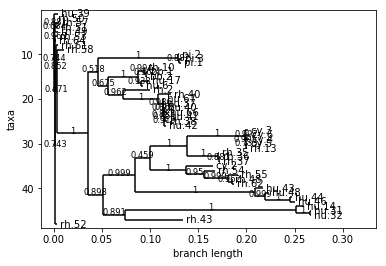

In [ ]:
Phylo.draw(tree)

In [ ]:
Phylo.draw_ascii(tree)

 , hu.39
 |
 | rh.50
 |
 , rh.57
 |
 | rh.51
 |
 | rh.49
 |
_, rh.53
 |
 | rh.64
 |
 , rh.61
 |
 |, rh.58
 ||
 ||                              , pi.2
 ||          ____________________|
 ||         |                    |, pi.3
 ||         |                    ||
 ||         |                     | pi.1
 ||         |
 ||         |           , rh.10
 ||        _|          ,|
 ||       | |          ||, bb.1
 ||       | |          |||
 ||       | |   _______| | bb.2
 ||       | |  |       |
 ||       | |  |       | _ hu.17
 ||       | |  |       ||
 ||       | |__|        | hu.6
 ||       |    |
 ||       |    |    ______ rh.2
 ||       |    |   |
 ||       |    |___|         __ rh.40
 ||       |        |        |
 ||       |        |________|, hu.67
 ||       |                 ||
 ||       |                 |, hu.37
 ||       |                  |
 ||       |                  |, hu.40
 ||       |                  ||
 ||       |                  || hu.66
 ||       |                  ||
 ||  

## Identified 11 clusters based off of the phylogenetic tree

Common matches for each cluster:  
They all match with the same gene
* rh.64 blast matches with Adeno-associated virus isolate rh.64 capsid protein VP1 (cap) gene. Sequence ID: AY530574.1 Length: 2217. Looks very well aligned.
* cy.5 matches with Non-human primate Adeno-associated virus isolate AAVcy.5 capsid protein (VP1) gene, complete cds Sequence ID: AY243017.1 Length: 2187
* cy.3 matches with Non-human primate Adeno-associated virus isolate AAVcy.3 capsid protein (VP1) gene, complete cds
* bb.1 matches with Non-human primate Adeno-associated virus isolate AAVbb.1 capsid protein (VP1) gene, complete cds

We might not trust the annotations that comes up for Blast because we only have the sequence of single genes. The gene sequence might align 100% but the sequence outside of these genes may not. If we have the sequences around our gene sequences, we may find that the sequences contain the gene we have but align with organisms we did not expect.



In [8]:
cluster1 = ["hu.39", "rh.50", "rh.57", "rh.51", "rh.49", "rh.53", "rh.64", "rh.61", "rh.58"]
cluster2 = ["pi.2", "pi.3", "pi.1"]
cluster3 = ["rh.10", "bb.1", "bb.2", "hu.17", "hu.6"]
cluster4 = ["rh.2", "rh.40", "hu.67", "hu.37", "hu.40", "hu.66", "hu.41", "rh.38", "hu.42"]
cluster5 = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13"]
cluster6 = ["rh.35", "rh.536", "rh.37"]
cluster7 = ["cy.2", "rh.54", "rh.55", "rh.48", "rh.62", "hu.43"]
cluster8 = ["hu.48", "hu.44", "hu.46"]
cluster9 = ["hu.14", "hu.31", "hu.32"]
cluster10 = ["rh.43"]
cluster11 = ["rh.52"]
clusters = [cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9, cluster10, cluster11]

## Parsed each cluster into arrays of sequences and records

In [ ]:
all_seq_data = []
for record in SeqIO.parse("seqs.fa", "fasta"):
    print("Name: " + record.id + "\n\n" + "Sequence: " + record.seq + "\n\n")
    all_seq_data.append(len(record.seq))

Name: bb.1

Sequence: atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggcgctgaaacctggagccccgaagcccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcggacgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccatcaccccagcgttctccagactccactacgggcatcggcaagaaaggccagcagcccgcgaaaaagagactcaactttgggcagactggcgactcagagtcagtgcccgaccctcaaccaatcggagaaccccccgcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctccccacctacaacaaccacctctacaagcaaatctccaacgggacttcgggaggaagcaccaacgacaacacctacttcggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagagactcaacttcaagctcttcaacatccaggtcaaggaggtc

In [10]:
cluster1seq = []
cluster2seq = []
cluster3seq = []
cluster4seq = []
cluster5seq = []
cluster6seq = []
cluster7seq = []
cluster8seq = []
cluster9seq = []
cluster10seq = []
cluster11seq = []

cluster1record = []
cluster2record = []
cluster3record = []
cluster4record = []
cluster5record = []
cluster6record = []
cluster7record = []
cluster8record = []
cluster9record = []
cluster10record = []
cluster11record = []

for record in SeqIO.parse("seqs.fa", "fasta"):
    for num in range(1, len(clusters) + 1):
        for gene in eval("cluster" + str(num)):
            if record.id == gene:
                eval("cluster" + str(num) + "seq").append(record.seq)  
                eval("cluster" + str(num) + "record").append(record)  

# Test that the sequence is in the correct array                
print(len(cluster9seq)) # 3
print(cluster9seq[1] == 'atggctgccgatggttatcttccagattggctcgaggacactctctctgaaggaataagacagtggtggaagctcaaacctggccccccaccaccaaagcccgcagagcggcataaggacgacagcaggggtcttgtgcttcctgggtacaagtacctcggacccggcaacggactcgacaagggggagccggtcaacgcagcagacgcggcggccctcgagcacgacaaggcctacgaccagcagctcaaggccggagacaacccgtacctcaagtacaaccacgccgacgccgagttccaggagcggctcaaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaaaaagaggcttcttgaacctcttggtctggttgaggaagcggctaagacggctcctggaaagaagaggcctgtagagcagtctcctcaggaaccggactcctccgcgggtattggcaaatcgggttcacagcccgctaaaaagaaactcaatttcggtcagactggcgacacagagtcagtccccgaccctcaaccaatcggagaacctcccgcagccccctcaggtgtgggatctcttacaatggcttcaggtggtggcgcaccagtggcagacaataacgaaggtgccgatggagtgggtagttcctcgggaaattggcattgcgattcccaatggctgggggacagagtcatcaccaccagcacccgaacctgggccctgcccacctacaacaatcacctctacaagcaaatctccaacagcacatctggaggatcttcaaatgacaacgcctacttcggctacagcaccccctgggggtattttgacttcaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcctaagcgactcaacttcaagctcttcaacattcaggtcaaagaggttacggacaacaatggagtcaagaccatcgccaataaccttaccagcacggtccaggtcttcacggactcagactatcagctcccgtacgtgctcgggtcggctcacgagggctgcctcccgccgttcccagcggacgttttcatgattcctcagtacgggtatctgacgcttaatgatggaggccaggccgtgggtcgttcgtccttttactgcctggaatatttcccgtcgcaaatgctaagaacgggtaacaacttccagttcagctacgagtttgagaacgtacctttccatagcagctacgctcacagccaaagcctggaccgactaatgaatccactcatcgaccaatacttgtactatctctcaaagactattaacggttctggacagaatcaacaaacgctaaaattcagtgtggccggacccagcaacatggctgtccagggaagaaactacatacctggacccagctaccgacaacaacgtgtctcaaccactgtgactcaaaacaacaacagcgaatttgcttggcctggagcttcttcttgggctctcaatggacgtaatagcttgatgaatcctggacctgctatggccagccacaaagaaggagaggaccgtttctttcctttgtccggatctttaatttttggcaaacaaggaactggaagagacaacgtggatgcggacaaagtcatgataaccaacgaagaagaaattaaaactactaacccggtagcaacggagtcctatggacaagtggccacaaaccaccagagtgcccaagcacaggcgcagaccggctgggttcaaaaccaaggaatacttccgggtatggtttggcaggacagagatgtgtacctgcaaggacccatttgggccaaaattcctcacacggacggcaactttcacccttctccgctaatgggagggtttggaatgaagcacccgcctcctcagatcctcatcaaaaacacacctgtacctgcggatcctccaacggctttcaataaggacaagctgaactctttcatcacccagtattctactggccaagtcagcgtggagattgagtgggagctgcagaaggaaaacagcaagcgctggaacccggagatccagtacacttccaactattacaagtctaataatgttgaatttgctgttagtactgaaggtgtatatagtgaaccccgccccattggcaccagatacctgactcgtaatctgtaa')
print(cluster9record[1].id) # hu.31


3
True
hu.31


## Aligned sequences using AlignIO

In [ ]:
align = AlignIO.read("seqs.aligned.fa", "fasta")

In [13]:
print(align)

SingleLetterAlphabet() alignment with 48 rows and 2238 columns
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.31
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.32
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.14
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.44
ATGGCTGCCGACGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.46
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.43
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.48
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.3
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.1
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.2
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.43
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.58
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.57
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.39
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.49
ATGGTTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.51
ATGGCTGCCGATGGTTATCTTCCAGATT

In [14]:
print(align[0])

ID: hu.31
Name: hu.31
Description: hu.31
Number of features: 0
Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet())


In [15]:
print(align[0].seq)

ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGAATAAGACAGTGGTGGAAGCTCAAACCTGGCCCCCCACCACCAAAGCCCGCAGAGCGGCATAAGGACGACAGCAGGGGTCTTGTGCTTCCTGGGTACAAGTACCTCGGACCCGGCAACGGACTCGACAAGGGGGAGCCGGTCAACGCAGCAGACGCGGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAGGCCGGAGACAACCCGTACCTCAAGTACAACCACGCCGACGCCGAGTTCCAGGAGCGGCTCAAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAAAAGAGGCTTCTTGAACCTCTTGGTCTGGTTGAGGAAGCGGCTAAGACGGCTCCTGGAAAGAAGAGGCCTGTAGAGCAGTCTCCTCAGGA---ACCGGACTCCTCCGCGGGTATTGGCAAATCGGGTTCACAGCCCGCTAAAAAGAAACTCAATTTCGGTCAGACTGGCGACACAGAGTCAGTCCCCGACCCTCAACCAATCGGAGAACCTCCCGCAGCCCCCTCAGGTGTGGGATCTCTTACAATGGCTTCAGGTGGTGGCGCACCAGTGGCAGACAATAACGAAGGTGCCGATGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCCAATGGCTGGGGGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAATCACCTCTACAAGCAAATCTCCAACAGCACATCTGGAGGATCTTCAAATGACAACGCCTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTCAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCTAAGCGACTCAACTTCAAGCTCTTCAACATTCAGGTCAAAGAGGTTACGGACAACAATGGAGTCAAGA

In [16]:
print(align[10].seq[:])

ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACTTGAAACCTGGAGCCCCGAAACCCAAAGCCAACCAGCAAAAGCAGGACGACGGCCGGGGCCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCGAAGCGGGTGACAATCCGTACCTGCGGTATAACCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGGCGCTAAGACGGCTCCTGGAAAGAAGAGACCAGTAGAGCAGTCACCCCAAGA---ACCAGACTCCTCCTCGGGCATCGGCAAGAAAGGCCAACAGCCCGCCAGAAAAAGACTCAATTTTGGCCAGACTGGCGACTCAGAGTCAGTTCCAGACCCTCAACCTCTCGGAGAACCTCCAGCAGCGCCCTCTGGTGTGGGACCTAATACAATGGCTGCAGGCGGTGGCGCACCAATGGCAGACAATAACGAAGGCGCCGACGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAACGGGACATCGGGAGGAGCCACCAACGACAACACCTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTTAACAGATTCCACTGCCACTTTTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAAGAGACTCAGCTTCAAGCTCTTCAACATCCAGGTCAAGGAGGTCACGCAGAATGAAGGCACCAAGA

In [17]:
len(align[47].seq)

2238

## Created arrays of aligned sequences from each cluster

In [18]:
cluster1seq_a = []
cluster2seq_a = []
cluster3seq_a = []
cluster4seq_a = []
cluster5seq_a = []
cluster6seq_a = []
cluster7seq_a = []
cluster8seq_a = []
cluster9seq_a = []
cluster10seq_a = []
cluster11seq_a = []

for record in AlignIO.read("seqs.aligned.fa", "fasta"):
    for num in range(1, len(clusters) + 1):
        for gene in eval("cluster" + str(num)):
            if record.id == gene:
                 eval("cluster" + str(num) + "seq_a").append(record.seq)

#test size of arrays
print(cluster9seq_a)
print(len(cluster9seq_a)) # 3
print(len(cluster1seq_a)) # 9
print(len(cluster11seq_a)) # 1


[Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTTAGTGAAGGA...TAA', SingleLetterAlphabet())]
3
9
1


In [19]:
print(len(cluster1seq_a[3]))

2238


## Calculated sequence statistics for each cluster
Functions for calculating A/T and G/C at each position in clusters

In [ ]:
cluster1ATGC = cluster2ATGC = cluster3ATGC = cluster4ATGC = cluster5ATGC = cluster6ATGC = []
cluster7ATGC = cluster8ATGC = cluster9ATGC = cluster10ATGC = cluster11ATGC = []

def ACGTPercentage(clusterseq_a):
    clusterAT = []
    clusterGC = []
    clusterATPercentage = []
    clusterGCPercentage = []
    for pos in range(len(clusterseq_a[0])):
        tempPosATCG = []
        AT = 0
        GC = 0
        for seq in clusterseq_a:
            tempPosATCG.append(seq[pos])
            AT = tempPosATCG.count("A") + tempPosATCG.count("T")
            GC = tempPosATCG.count("G") + tempPosATCG.count("C")
            #print(tempPosATCG)
        clusterAT.append(AT)
        clusterGC.append(GC)
    for num in clusterAT:
        clusterATPercentage.append(num / len(clusterseq_a))
        #print(num / len(clusterseq_a))
    for num in clusterGC:
        clusterGCPercentage.append(num / len(clusterseq_a))
    return [clusterATPercentage, clusterGCPercentage]

cluster1ATCG = ACGTPercentage(cluster1seq_a)
cluster2ATCG = ACGTPercentage(cluster2seq_a)
cluster3ATCG = ACGTPercentage(cluster3seq_a)
cluster4ATCG = ACGTPercentage(cluster4seq_a)
cluster5ATCG = ACGTPercentage(cluster4seq_a)
cluster6ATCG = ACGTPercentage(cluster6seq_a)
cluster7ATCG = ACGTPercentage(cluster7seq_a)
cluster8ATCG = ACGTPercentage(cluster8seq_a)
cluster9ATCG = ACGTPercentage(cluster9seq_a)
cluster10ATCG = ACGTPercentage(cluster10seq_a)
cluster11ATCG = ACGTPercentage(cluster11seq_a)


In [21]:
i = 0;
j = 0;
AT = 0;
GC = 0;
total = 0;
x = [];
y_AT = [];
y_GC = [];
while i < len(align[0].seq):
    while j < len(align):
        nucleotide = align[j].seq[i]
        if nucleotide == "A" or nucleotide == "T":
            AT += 1
        elif nucleotide == "G" or nucleotide == "C":
            GC += 1
        else:
            total += 1
        j += 1
    x.append(i+1)
    y_AT.append(AT/(GC + AT + total))
    y_GC.append(GC/(GC + AT + total))
    AT, GC, total, j = 0, 0, 0, 0
    i += 1

print(y_AT)     

[1.0, 1.0, 0.0, 0.0, 0.020833333333333332, 1.0, 0.0, 0.0, 0.3333333333333333, 0.0, 1.0, 0.6458333333333334, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.020833333333333332, 0.0, 1.0, 0.0, 0.0, 0.9791666666666666, 0.0, 1.0, 0.9166666666666666, 0.08333333333333333, 0.0, 1.0, 0.020833333333333332, 1.0, 0.0, 1.0, 0.0, 1.0, 0.10416666666666667, 0.0, 0.0, 0.10416666666666667, 1.0, 1.0, 1.0, 0.08333333333333333, 0.0, 0.08333333333333333, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.08333333333333333, 0.8541666666666666, 0.020833333333333332, 0.22916666666666666, 1.0, 0.0, 1.0, 0.9791666666666666, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.9166666666666666, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.10416666666666667, 0.8333333333333334, 0.9166666666666666, 0.6666666666666666, 0.0, 0.0, 0.08333333333333333, 1.0, 1.0, 0.625, 0.0, 0.0, 0.020833333333333332, 0.9166666666666666, 0.9166666666666666, 0.10416666666666667, 0.0, 1.0, 0.020833333333333332, 0.0, 0.91666

## Generated a barplot for each cluster 

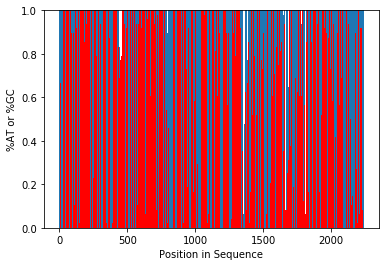

In [22]:
plt.ylabel('%AT or %GC')
plt.xlabel('Position in Sequence')
p1 = plt.bar(x, y_GC, color="red", width = 1)
p2 = plt.bar(x, y_AT, bottom=y_GC, width = 1)
plt.show()


Function for generating the barplot

Position in Sequence vs AT/GC percentage: Cluster 1 

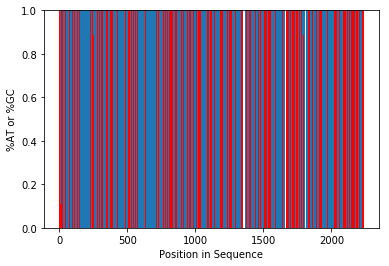

In [24]:
def AGCTbarplot(clusterATCG):
    plt.ylabel('%AT or %GC')
    plt.xlabel('Position in Sequence')
    p1 = plt.bar([x for x in range(len(clusterATCG[0]))], clusterATCG[0], color="red", width = 1)
    p2 = plt.bar([x for x in range(len(clusterATCG[0]))], clusterATCG[1], bottom=clusterATCG[0], width = 1)
    plt.show()
AGCTbarplot(cluster1ATCG)


Position in Sequence vs AT/GC percentage: Cluster 2

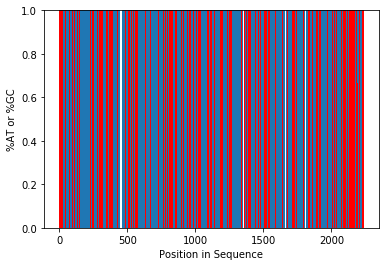

In [25]:
AGCTbarplot(cluster2ATCG)

Position in Sequence vs AT/GC percentage: Cluster 3

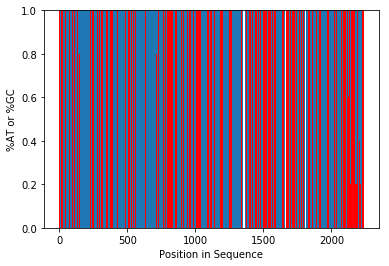

In [26]:
AGCTbarplot(cluster3ATCG)

Position in Sequence vs AT/GC percentage: Cluster 4

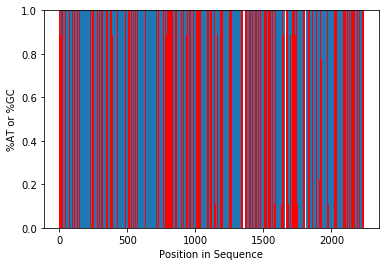

In [27]:
AGCTbarplot(cluster4ATCG)

Position in Sequence vs AT/GC percentage: Cluster 5

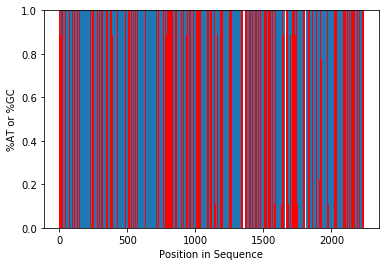

In [30]:
AGCTbarplot(cluster5ATCG)

## Generated a box plot for each cluster 

In [35]:
seq_length = []
num = 1
while num < 12:
    temp_cluster_org = eval("cluster"+str(num)+"seq")
    y = 0
    temp_single_cluster = []
    while y < len(temp_cluster_org):
        temp_single_cluster.append(len(temp_cluster_org[y]))
        y+=1
    
    seq_length.append(temp_single_cluster)
    num += 1
    
print(seq_length)

[[2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217], [2196, 2196, 2196], [2217, 2217, 2217, 2217, 2217], [2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217], [2187, 2187, 2187, 2187, 2187], [2190, 2190], [2214, 2214, 2214, 2214, 2214, 2214], [2211, 2211, 2211], [2211, 2211, 2211], [2211], [2217]]


In [36]:
[len(x) for x in cluster1seq]

[2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217]

In [37]:
len(clusters)

11

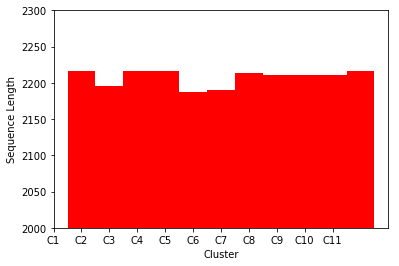

In [ ]:
import numpy as np

plt.ylabel('Sequence Length')
plt.xlabel('Cluster')
plt.ylim(2000, 2300)
plt.xlim(0,12)
plt.xticks(np.arange(11), ('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11'))

p1 = plt.bar([1,2,3,4,5,6,7,8,9,10,11], [np.mean(x)for x in seq_length], yerr=[np.std(x) for x in seq_length],  color="red", width = 1)
plt.show()


{'boxes': [<matplotlib.lines.Line2D at 0x7f0767f68198>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0767f71a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0767f7b390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0767f71f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0767f68d30>,
  <matplotlib.lines.Line2D at 0x7f0767f711d0>]}

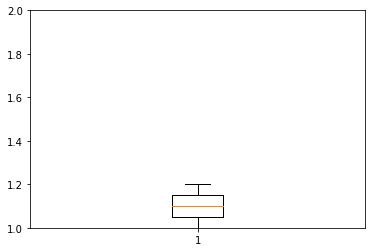

In [41]:
plt.ylim(1, 2)
plt.boxplot([1, 1.2])

{'boxes': [<matplotlib.patches.PathPatch at 0x7f1e50b47b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1e500ec7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1e500c7b00>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1e500ec588>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1e507a6908>,
  <matplotlib.lines.Line2D at 0x7f1e51a401d0>]}

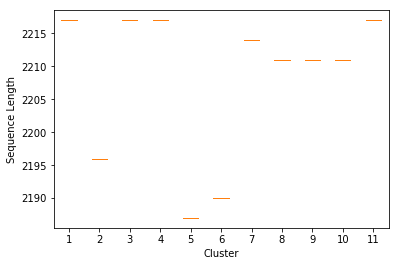

In [45]:

plt.ylabel('Sequence Length')
plt.xlabel('Cluster')

plt.boxplot(seq_length, vert=True, patch_artist=True)

[2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238]


{'boxes': [<matplotlib.lines.Line2D at 0x7f1e50adb6a0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1e50ae00f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1e50ae0d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1e50ae0940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1e50adb7f0>,
  <matplotlib.lines.Line2D at 0x7f1e50adbc88>]}

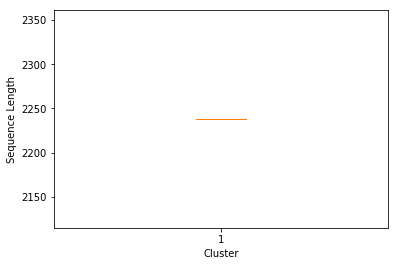

In [74]:
print(all_seq_data)
#for x in range(len(align)):
 #   all_seq_data.append(len(align[x].seq))
plt.ylabel('Sequence Length')
plt.xlabel('Cluster')
plt.boxplot(all_seq_data)